Projecting when Malta (EU Member State) will reach Herd Immunity based on past trends

Assumptions:

Herd Immunity Entirely reliant on vaccinations ( i.e. contracting Covid doesn't count)
Each person needs to receive two doses to be considered immunised (this model doesn't account for the possible introduction of Johnson & Johnson Single Dose Vaccine)

Last Updated - 04/03/2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math

In [2]:
total_doses = [13002, 14276, 15316, 16531, 17767, 18930, 19981, 21172, 22371, 23512, 24680, 25822, 26847, 27759, 29002, 30252,31633, 33477, 35676, 37586, 39257, 41285, 43337, 44598, 46344, 48474, 50175, 51641, 53647, 55709, 57683, 59702, 62059, 63308, 64419, 66334, 68779, 71562, 73644, 76159, 77967, 79624, 81883, 84129, 86854]
second_doses = [0, 0, 0, 0, 0, 0, 1198, 1463, 1694, 2095, 2518, 2969, 3456, 3948, 4476, 4891, 5410, 6457, 7594, 8749, 9918, 11050, 12135, 12928, 13820, 14739, 15601, 16235, 17102, 17843, 18536, 19199, 19828, 20189,20531, 21160, 21767, 22501, 23395, 25118, 26781, 28048, 29021, 29748, 30329]

In [3]:
total_doses = np.array(total_doses)
second_doses = np.array(second_doses)
first_doses = total_doses - second_doses
days = np.arange(0, len(total_doses))

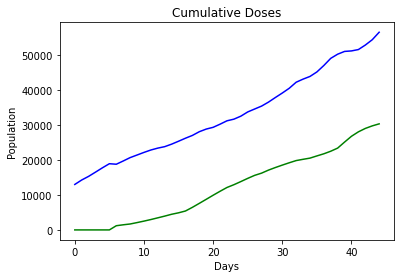

In [4]:
plt.plot(days, first_doses, label = 'First Dose', color = 'blue')
plt.plot(days, second_doses, label = 'Second Dose', color = 'green')
plt.title('Cumulative Doses')
plt.ylabel('Population')
plt.xlabel('Days')
plt.show() 

Unfortunately the graphs indicate that we are seeing a roughly linear increase in doses - i.e. the rate of daily vaccinations is not increasing but remaining roughly constant

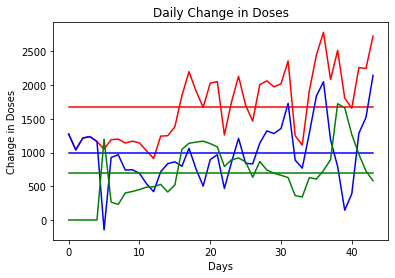

Average Daily Increase in total doses:  1678
Average Daily Increase in first doses:  989
Average Daily Increase in second doses:  689


In [5]:
def first_difference(data):
  diff = []
  for i in range(len(data)-1):
    diff.append(data[i+1] - data[i])
  return diff

change_in_total_doses = first_difference(total_doses)
mean_change_total_array = np.mean(change_in_total_doses)*np.ones(len(change_in_total_doses))
change_in_first_doses = first_difference(first_doses)
mean_change_first_array = np.mean(change_in_first_doses)*np.ones(len(change_in_first_doses))
change_in_second_doses = first_difference(second_doses)
mean_change_second_array = np.mean(change_in_second_doses)*np.ones(len(change_in_second_doses))
samples = np.arange(0, len(change_in_total_doses))

plt.plot(samples, change_in_total_doses, label = 'Total Dose Daily Difference', color = 'red')
plt.plot(samples, mean_change_total_array, label = 'Total Dose Daily Difference Mean', color = 'red')
plt.plot(samples, change_in_first_doses, label = 'First Dose Daily Difference', color = 'blue')
plt.plot(samples, mean_change_first_array, label = 'First Dose Daily Difference Mean', color = 'blue')
plt.plot(samples, change_in_second_doses, label = 'Second Dose Daily Difference', color = 'green')
plt.plot(samples, mean_change_second_array, label = 'Second Dose Daily Difference Mean', color = 'green')
plt.title('Daily Change in Doses')
plt.ylabel('Change in Doses')
plt.xlabel('Days')
plt.show() 

print('Average Daily Increase in total doses: ', int(np.mean(change_in_total_doses)))
print('Average Daily Increase in first doses: ', int(np.mean(change_in_first_doses)))
print('Average Daily Increase in second doses: ', int(np.mean(change_in_second_doses)))

In [6]:
total_mean = np.mean(change_in_total_doses)
first_mean = np.mean(change_in_first_doses)
second_mean = np.mean(change_in_second_doses)

total_std = np.std(change_in_total_doses)
first_std = np.std(change_in_first_doses)
second_std = np.std(change_in_second_doses)

cum_total = total_doses[len(total_doses)-1]
cum_first = first_doses[len(first_doses)-1]
cum_second = second_doses[len(second_doses)-1]



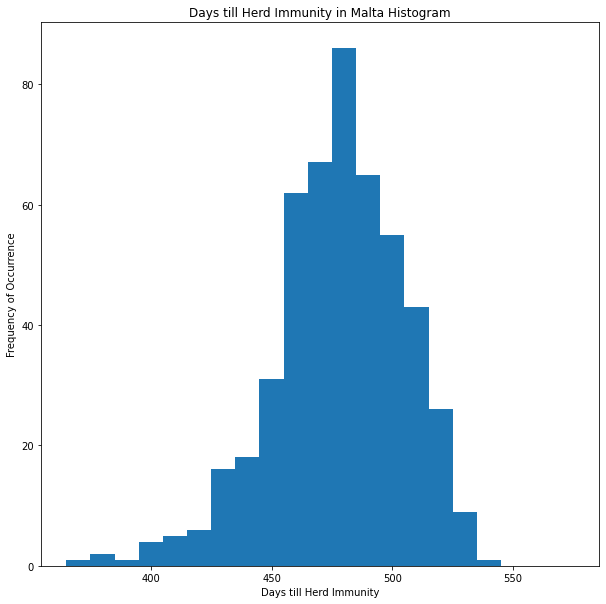

Correlation between Required Level of Herd Immunity and Time Required to get Herd Immunity: 94.30015749433423 %


In [11]:
iterations = 500
population = 493559
herd_immunity = [70, 80, 90] # between 70 to 90

immunity_values = []
vaccine_efficacy = 100 # how effective from 0 to 100

percentage_increase = 0/100

threshold = 1000

days_leftList = []
for i in range(1, iterations):

  immunised_threshold = int(population * np.random.normal(np.mean(herd_immunity), np.std(herd_immunity))/100)/(vaccine_efficacy/100)
  days_left = 0
  cum_total = total_doses[len(total_doses)-1]
  cum_first = first_doses[len(first_doses)-1]
  cum_second = second_doses[len(second_doses)-1]

  total_history = total_doses.tolist()
  first_history = first_doses.tolist()
  second_history = second_doses.tolist()
  
  while cum_second < immunised_threshold:

    # get likely change in vaccinations
    s_total = int(np.random.normal(total_mean, total_std))*(1+percentage_increase)
    s_first = int(np.random.normal(first_mean, first_std))*(1+percentage_increase)
    s_second = int(np.random.normal(second_mean, second_std))*(1+percentage_increase)
    
    cum_total += (s_total)

    if cum_first + (s_first) <= population:
      cum_first += (s_first)
    else:
      s_second += (s_first)

    cum_second += (s_second)

    (total_history).append(cum_total)
    (first_history).append(cum_first)
    (second_history).append(cum_second)

    days_left += 1

  days_leftList.append(days_left)
  immunity_values.append(immunised_threshold)

myBins = (np.arange(min(days_leftList), max(days_leftList), 10))

fig, ax = plt.subplots(figsize = (10,10))
ax.hist(days_leftList, bins = myBins)
plt.xlabel('Days till Herd Immunity')
plt.ylabel('Frequency of Occurrence')
plt.title('Days till Herd Immunity in Malta Histogram')
plt.show()

corr = np.corrcoef(days_leftList,immunity_values)
print('Correlation between Required Level of Herd Immunity and Time Required to get Herd Immunity:', corr[0][1]*100, '%')

In [12]:
plt.savefig('herd_immunity_histogram.png')

<Figure size 432x288 with 0 Axes>